In this code, we give the following input, and the code gives us the FULL COORDINATES of the split boxes and the spheres.
The spheres can be used for velocity inlet in non uniform form.
THe boxes are full, that means it might be useful for cases with NO PERIODIC BOUNDARY CONDITIONS.

In [1]:
# Define the domain boundaries
x_stl = 0.002
Lx = 0.009
y_stl = 0.0
Ly = 0.01
z_stl = 0.006
Lz = 0.011
flow_direction = '+x'
ratio = 0.5
delta = 6
percentage = 1 / 100
w = 0.0001
dx = 9e-6
# Flags for periodicity should be boolean
is_periodic_x = False
is_periodic_y = True
is_periodic_z = True

In [2]:
# Calculate the number of grid points based on dx and lengths
Nx_full = round(Lx / dx)
Ny_full = round(Ly / dx)
Nz_full = round(Lz / dx)

# Adjust grid points for the percentage of the STL box dimensions
if is_periodic_x:
    Nx = round(percentage * Nx_full) - (delta)
    x0 = x_stl + (Lx - (Nx * dx)) / 2
else:
    Nx = Nx_full + delta
    x0 = x_stl - ((delta/2) * dx)

if is_periodic_y:
    Ny = round(percentage * Ny_full) - (delta)
    y0 = y_stl + (Ly - (Ny * dx)) / 2
else:
    Ny = Ny_full + delta
    y0 = y_stl - ((delta/2) * dx)

if is_periodic_z:
    Nz = round(percentage * Nz_full) - (delta)
    z0 = z_stl + (Lz - (Nz * dx)) / 2
else:
    Nz = Nz_full + delta
    z0 = z_stl - ((delta/2) * dx)

# Calculate new origins based on the adjusted dimensions
x0 = x_stl + (Lx - (Nx * dx)) / 2
y0 = y_stl + (Ly - (Ny * dx)) / 2
z0 = z_stl + (Lz - (Nz * dx)) / 2

# Mesh box dimensions
xmin_mesh = x_stl + (ratio * Lx)
xmax_mesh = x0 + Nx * dx - (0.5*delta*dx)
ymin_mesh = y0 + (0.5*delta*dx)
ymax_mesh = y0 + Ny * dx - (0.5*delta*dx)
zmin_mesh = z0 + (0.5*delta*dx)
zmax_mesh = z0 + Nz * dx - (0.5*delta*dx)
xmax_stl = x_stl + Lx
ymax_stl = y_stl + Ly
zmax_stl = z_stl + Lz



Main Box:
x0	x1	y0	y1	z0	z1	thickness
Tanh	0.0020	0.0065	0.0000	0.0100	0.0060	0.0170	0.0001
Sphere Coordinates for Part 1 (x, y, z, R, w): (0.002, 0.005, 0.0115, 0.005, 0.0001)

Sub-Box:
x0	x1	y0	y1	z0	z1	thickness
Tanh	0.0065	0.0110	0.0000	0.0100	0.0060	0.0170	0.0001
Sphere Coordinates for Part 2 (x, y, z, R, w): (0.0065, 0.005, 0.0115, 0.005, 0.0001)


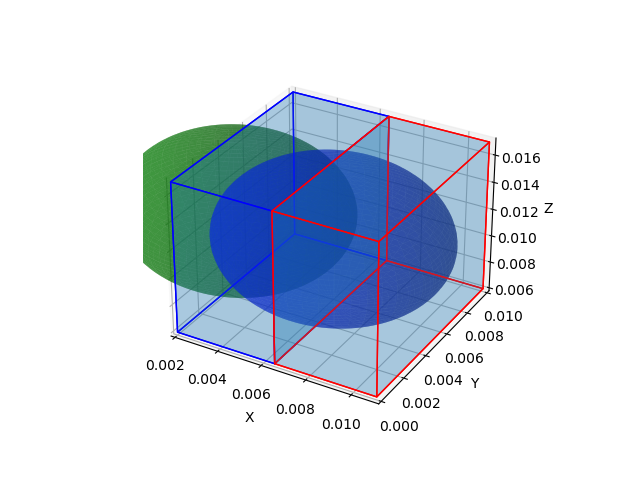

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import math
plt.close()

# Calculate sphere coordinates, radius, and w for the specified domain and flow direction
def calculate_sphere_coordinates(x_stl, Lx, y_stl, Ly, z_stl, Lz, flow_direction, ratio):
    if flow_direction not in ('+x', '-x', '+y', '-y', '+z', '-z'):
        raise ValueError("Invalid flow direction. Use '+x', '-x', '+y', '-y', '+z', or '-z'.")

    x_center = x_stl + Lx * 0.5
    y_center = y_stl + Ly * 0.5
    z_center = z_stl + Lz * 0.5

    # Update the calculation of sphere centers
    if flow_direction == '+x':
        x_center = x_stl
        y_center = y_stl + Ly * 0.5
        z_center = z_stl + Lz * 0.5
    elif flow_direction == '-x':
        x_center = x_stl + Lx
        y_center = y_stl + Ly * 0.5
        z_center = z_stl + Lz * 0.5
    elif flow_direction == '+y':
        x_center = x_stl + Lx * 0.5
        y_center = y_stl
        z_center = z_stl + Lz * 0.5
    elif flow_direction == '-y':
        x_center = x_stl + Lx * 0.5
        y_center = y_stl + Ly
        z_center = z_stl + Lz * 0.5
    elif flow_direction == '+z':
        x_center = x_stl + Lx * 0.5
        y_center = y_stl + Ly * 0.5
        z_center = z_stl
    elif flow_direction == '-z':
        x_center = x_stl + Lx * 0.5
        y_center = y_stl + Ly * 0.5
        z_center = z_stl + Lz
    else:
        raise ValueError("Invalid flow direction. Use '+x', '-x', '+y', '-y', '+z', or '-z'.")

    # Update the calculation of sphere radius
    if flow_direction in ('+x', '-x'):
        R = (Ly) / 2
    elif flow_direction in ('+y', '-y'):
        R = (Ly) / 2
    elif flow_direction in ('+z', '-z'):
        R = (Ly) / 2
    else:
        raise ValueError("Invalid flow direction. Use '+x', '-x', '+y', '-y', '+z', or '-z'.")

    w = 0.0001
    
    return x_center, y_center, z_center, R, w

# Calculate sphere coordinates for both parts
coordinates_part1 = calculate_sphere_coordinates(x_stl, Lx * ratio, y_stl, Ly, z_stl, Lz, flow_direction, ratio)
coordinates_part2 = calculate_sphere_coordinates(x_stl + Lx * ratio, Lx * (1 - ratio), y_stl, Ly, z_stl, Lz, flow_direction, ratio)

# Calculate coordinates for both parts
x0_part1, x1_part1 = x_stl, x_stl + Lx * ratio
y0_part1, y1_part1 = y_stl, y_stl + Ly
z0_part1, z1_part1 = z_stl, z_stl + Lz

x0_part2, x1_part2 = x_stl + Lx * ratio, x_stl + Lx
y0_part2, y1_part2 = y_stl, y_stl + Ly
z0_part2, z1_part2 = z_stl, z_stl + Lz

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define vertices and edges for both parts
vertices_part1 = [
    [x0_part1, y0_part1, z0_part1],
    [x1_part1, y0_part1, z0_part1],
    [x1_part1, y1_part1, z0_part1],
    [x0_part1, y1_part1, z0_part1],
    [x0_part1, y0_part1, z1_part1],
    [x1_part1, y0_part1, z1_part1],
    [x1_part1, y1_part1, z1_part1],
    [x0_part1, y1_part1, z1_part1]
]

vertices_part2 = [
    [x0_part2, y0_part2, z0_part2],
    [x1_part2, y0_part2, z0_part2],
    [x1_part2, y1_part2, z0_part2],
    [x0_part2, y1_part2, z0_part2],
    [x0_part2, y0_part2, z1_part2],
    [x1_part2, y0_part2, z1_part2],
    [x1_part2, y1_part2, z1_part2],
    [x0_part2, y1_part2, z1_part2]
]

# Define edges for both parts
edges_part1 = [
    [vertices_part1[0], vertices_part1[1], vertices_part1[2], vertices_part1[3]],
    [vertices_part1[4], vertices_part1[5], vertices_part1[6], vertices_part1[7]],
    [vertices_part1[0], vertices_part1[1], vertices_part1[5], vertices_part1[4]],
    [vertices_part1[2], vertices_part1[3], vertices_part1[7], vertices_part1[6]],
    [vertices_part1[0], vertices_part1[3], vertices_part1[7], vertices_part1[4]],
    [vertices_part1[1], vertices_part1[2], vertices_part1[6], vertices_part1[5]]
]

edges_part2 = [
    [vertices_part2[0], vertices_part2[1], vertices_part2[2], vertices_part2[3]],
    [vertices_part2[4], vertices_part2[5], vertices_part2[6], vertices_part2[7]],
    [vertices_part2[0], vertices_part2[1], vertices_part2[5], vertices_part2[4]],
    [vertices_part2[2], vertices_part2[3], vertices_part2[7], vertices_part2[6]],
    [vertices_part2[0], vertices_part2[3], vertices_part2[7], vertices_part2[4]],
    [vertices_part2[1], vertices_part2[2], vertices_part2[6], vertices_part2[5]]
]

# Plot the edges of both parts
ax.add_collection3d(Poly3DCollection(edges_part1, edgecolor='b', lw=1, alpha=0.2))
ax.add_collection3d(Poly3DCollection(edges_part2, edgecolor='r', lw=1, alpha=0.2))

# Plot the spheres for both parts with correct radius
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Sphere for Part 1
x1 = coordinates_part1[3] * np.outer(np.cos(u), np.sin(v)) + coordinates_part1[0]
y1 = coordinates_part1[3] * np.outer(np.sin(u), np.sin(v)) + coordinates_part1[1]
z1 = coordinates_part1[3] * np.outer(np.ones(np.size(u)), np.cos(v)) + coordinates_part1[2]
ax.plot_surface(x1, y1, z1, color='g', alpha=0.5)

# Sphere for Part 2
x2 = coordinates_part2[3] * np.outer(np.cos(u), np.sin(v)) + coordinates_part2[0]
y2 = coordinates_part2[3] * np.outer(np.sin(u), np.sin(v)) + coordinates_part2[1]
z2 = coordinates_part2[3] * np.outer(np.ones(np.size(u)), np.cos(v)) + coordinates_part2[2]
ax.plot_surface(x2, y2, z2, color='b', alpha=0.5)

# Set axis labels and limits (adjust as needed)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([x_stl, x_stl + Lx])
ax.set_ylim([y_stl, y_stl + Ly])
ax.set_zlim([z_stl, z_stl + Lz])

# Print
print("\nMain Box:")
print(f"x0\tx1\ty0\ty1\tz0\tz1\tthickness")
print(f"Tanh\t{x0_part1:.4f}\t{x1_part1:.4f}\t{y0_part1:.4f}\t{y1_part1:.4f}\t{z0_part1:.4f}\t{z1_part1:.4f}\t{w:.4f}")
print("Sphere Coordinates for Part 1 (x, y, z, R, w):", coordinates_part1)

print("\nSub-Box:")
print(f"x0\tx1\ty0\ty1\tz0\tz1\tthickness")
print(f"Tanh\t{x0_part2:.4f}\t{x1_part2:.4f}\t{y0_part2:.4f}\t{y1_part2:.4f}\t{z0_part2:.4f}\t{z1_part2:.4f}\t{w:.4f}")
print("Sphere Coordinates for Part 2 (x, y, z, R, w):", coordinates_part2)

plt.show()